In [1]:
import os

In [2]:
os.chdir('../dependencies/')

In [3]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
from linear_regression import linear_regression
from math import exp

In [4]:
class logistic_regression:
    def __init__(self,filename, alphas, number_of_iterations, training_perc, threshold = 0.5) : 
        self.filename = filename
        self.threshold = threshold
        self.alphas = alphas
        self.k = number_of_iterations
        self.training_perc = training_perc
        self.load_data()
        
    def load_data(self):
        df_data = analytics.read_csv(filename+".csv")
        names = ['x'+str(i+1) for i in range((df_data.shape[1])-1)] + ['y']
        df_data = analytics.read_csv(filename+".csv" , names = names)
        df_data['x0'] = 1
        cols = list(df_data.columns)
        cols = [cols[-1]] + list(cols[:-1])
        df_data = df_data[cols]
        df_data['y'] = df_data['y'].replace(-1,0)

        df_data_changed = df_data.drop(['x0','y'],axis = 1)
        df_data_changed['y']  = 0
        df_data_changed.to_csv(filename+'_changed.csv',index=False,header=False)
        self.df_data = df_data
        self.find_weights()
        
    
    def find_weights(self):
        lr = linear_regression()
        lr.load_data(filename+'_changed.csv')
        lr.monte_carlo(self.alphas,self.k,self.training_perc)
        training_set , testing_set = lr.split_data()
        lr.train( training_set , sgd  = True, plot_rmse = False , plot_metrics = False )
        lr.test(testing_set)
        self.maxima = lr.maxima
        self.minima = lr.minima
        self.w_star = lr.w_star
        self.predict()
        
    def predict(self):
        df_data = self.df_data
        if 'y_pred' in df_data.columns : df_data = df_data.drop('y_pred',axis=1)
        x = df_data.iloc[:,:-1]
        for col in range(len(self.minima)):
            x.iloc[:,col] = (x.iloc[:,col] - self.minima[col]) / (self.maxima[col] - self.minima[col])
        y_pred = []
        for i in range(len(df_data)):
            y_pred.append(self.logit(x.iloc[i]))
        y_pred = [1 if y > self.threshold else 0 for y in y_pred]
        df_data['y_pred'] = y_pred
        self.create_confusion_matrix(df_data['y'],df_data['y_pred'])
        self.df_data = df_data
        
        
    def bernoullis_distribution(self,x):
        db = maths.matmul(self.w_star.T,x)
        denominator = 1 + exp(-db)
        return 1/denominator

    def logit(self,x):
        x = maths.matrix(x)
        f_x = self.bernoullis_distribution(x.T)
        return (f_x)/(1-f_x)

    def create_confusion_matrix(self,y,y_pred):
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for i in range(len(y)):
            if y[i] == y_pred[i] == 1:
                tp = tp + 1
            elif y[i] == y_pred[i] == 0:
                tn = tn + 1
            elif y[i] == 1 and y_pred[i] == 0:
                fn = fn + 1
            else :
                fp = fp + 1

        conf_mat = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
        print("Confusion Matrix : ",conf_mat)
        self.confusion_matrix = conf_mat
        accuracy = self.find_accuracy()
        precision = self.find_precision()
        sensitivity = self.find_sensitivity()
        specificity = self.find_specificity()
        fscore = self.find_fscore()
 

    def find_precision(self,show = True):
        conf_mat = self.confusion_matrix
        precision = round((conf_mat['tp'])/(conf_mat['fp']+conf_mat['tp'])*100,2) 
        if show : print("Precision : ",precision,"%")
        return precision

    def find_accuracy(self, show = True):
        conf_mat = self.confusion_matrix
        accuracy = round((conf_mat['tp']+conf_mat['fp'])/(conf_mat['tp'] + conf_mat['tn'] + conf_mat['fp'] + conf_mat['fn'])*100,2)
        if show : print("Accuracy : ",accuracy,"%")
        return accuracy

    def find_sensitivity(self,show = True):
        conf_mat = self.confusion_matrix
        sensitivity = round((conf_mat['tp'])/(conf_mat['tp']+conf_mat['fn'])*100,2)
        if show : print("Sensivity : ",sensitivity,"%")
        return sensitivity

    def find_specificity(self,show = True):
        conf_mat = self.confusion_matrix
        specificity = round((conf_mat['tn'])/(conf_mat['fp']+conf_mat['tn'])*100,2)
        if show : print("Specificity : ",specificity,"%")
        return specificity

    def find_fscore(self,show=True):
        conf_mat = self.confusion_matrix
        f_score = round(2/((1/self.find_precision(False))+(1/self.find_sensitivity(False)))*100,2)
        if show : print("F1 Score : ",f_score,"%")
        return f_score        


For iteration number  1  : 
	Average RMSE for alpha :  0.0  :  52.272050109116456
	Average RMSE for alpha :  0.1  :  0.4570888422078888
	Average RMSE for alpha :  0.2  :  0.409770606700974
	Average RMSE for alpha :  0.30000000000000004  :  0.47714341212753714
	Average RMSE for alpha :  0.4  :  0.3498970215528242
	Average RMSE for alpha :  0.5  :  0.6027049391803107
	Average RMSE for alpha :  0.6000000000000001  :  0.7164668711035292
	Average RMSE for alpha :  0.7000000000000001  :  0.16317807224707068
	Average RMSE for alpha :  0.8  :  0.6496277742331331
	Average RMSE for alpha :  0.9  :  0.5903472762201322

For iteration number  2  : 
	Average RMSE for alpha :  0.0  :  124.3945026600767
	Average RMSE for alpha :  0.1  :  0.33197625776343714
	Average RMSE for alpha :  0.2  :  0.20273824429932985
	Average RMSE for alpha :  0.30000000000000004  :  0.49095395633828487
	Average RMSE for alpha :  0.4  :  0.24527161538987152
	Average RMSE for alpha :  0.5  :  0.22125804221058767
	Average RMS

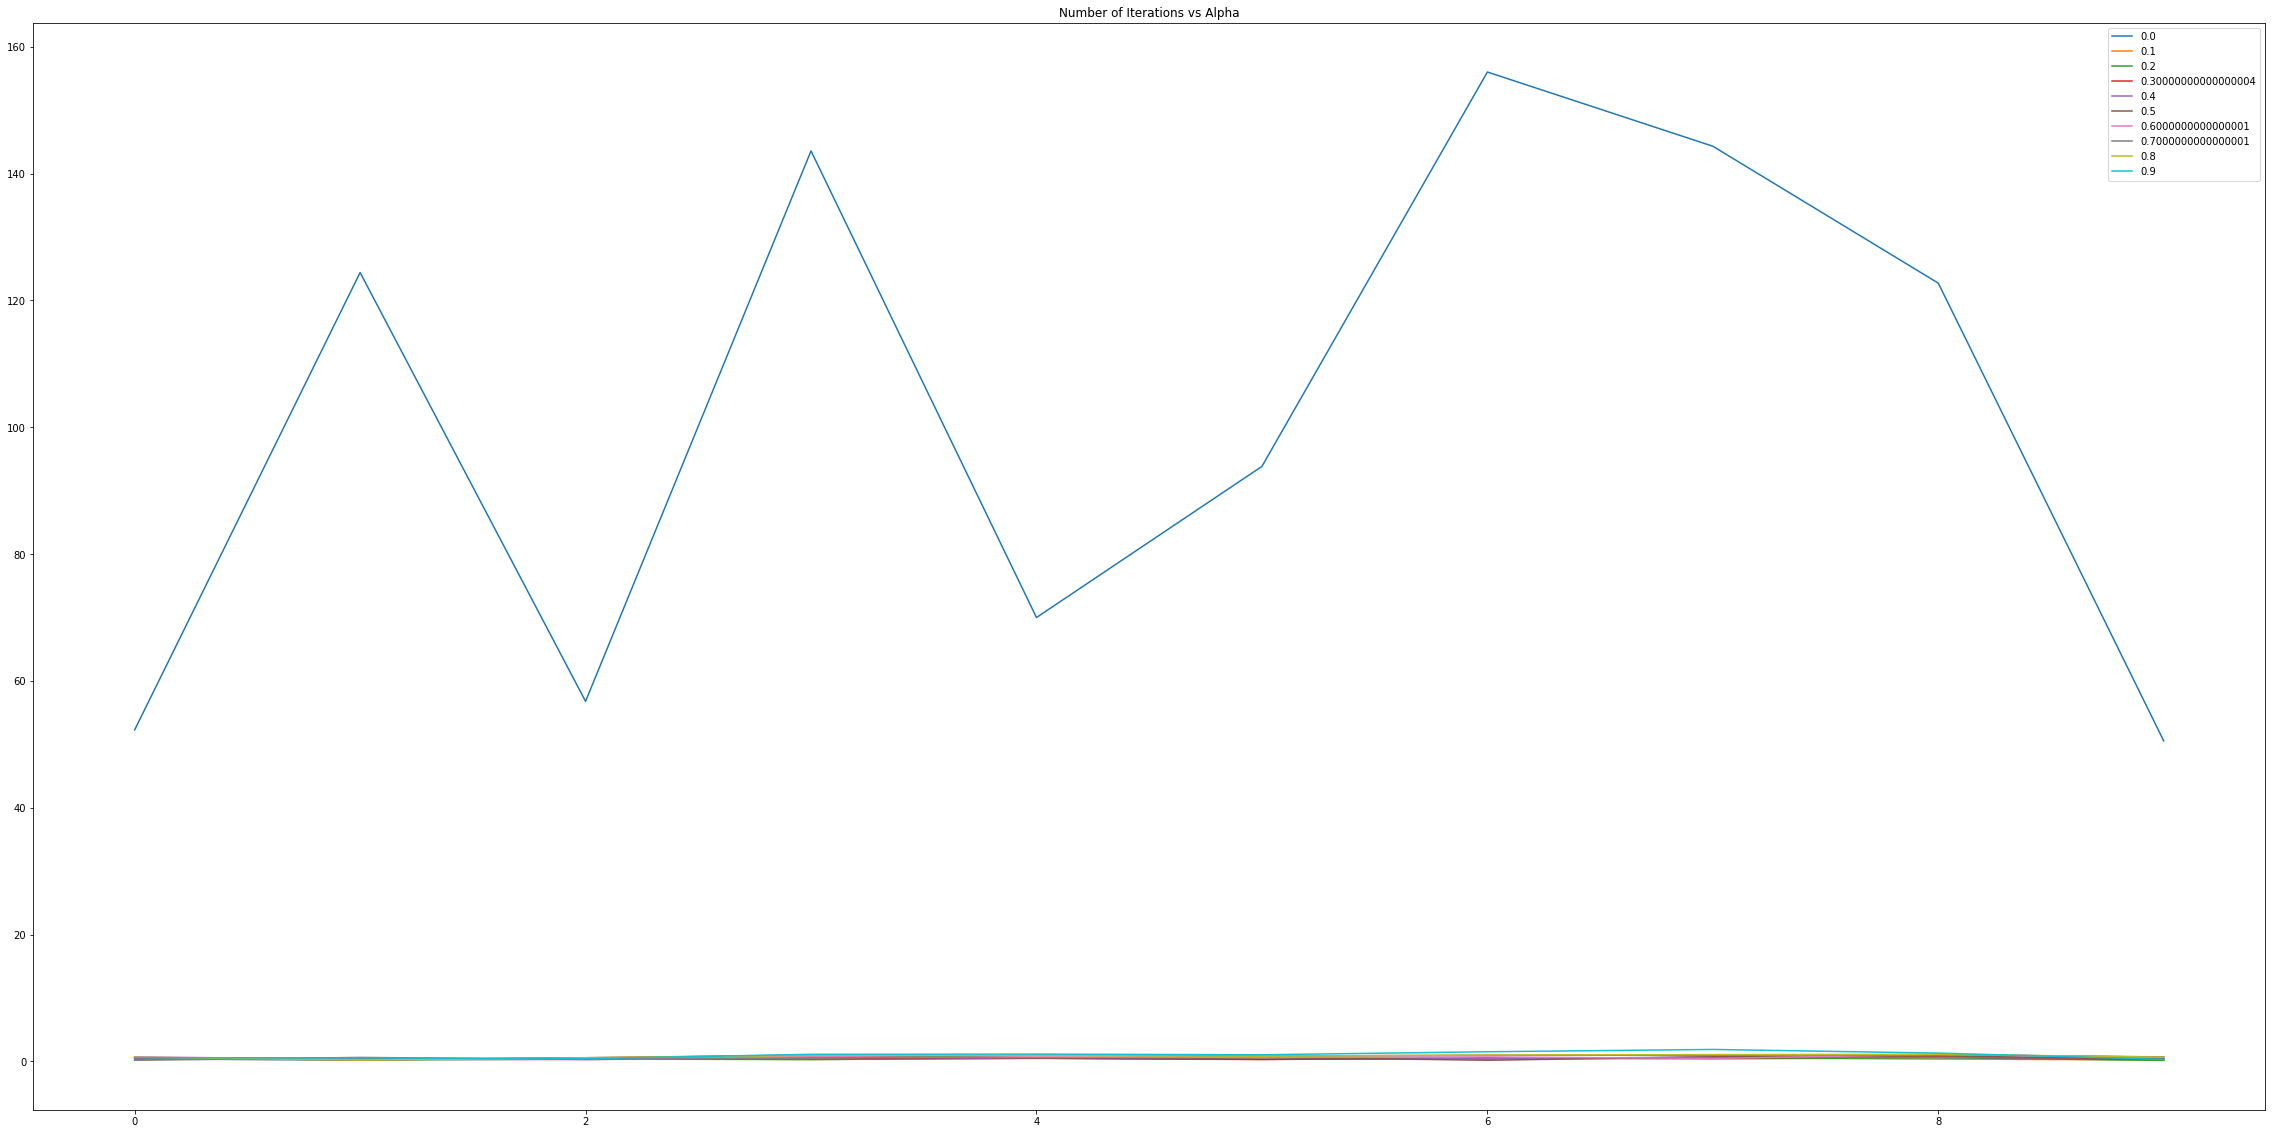

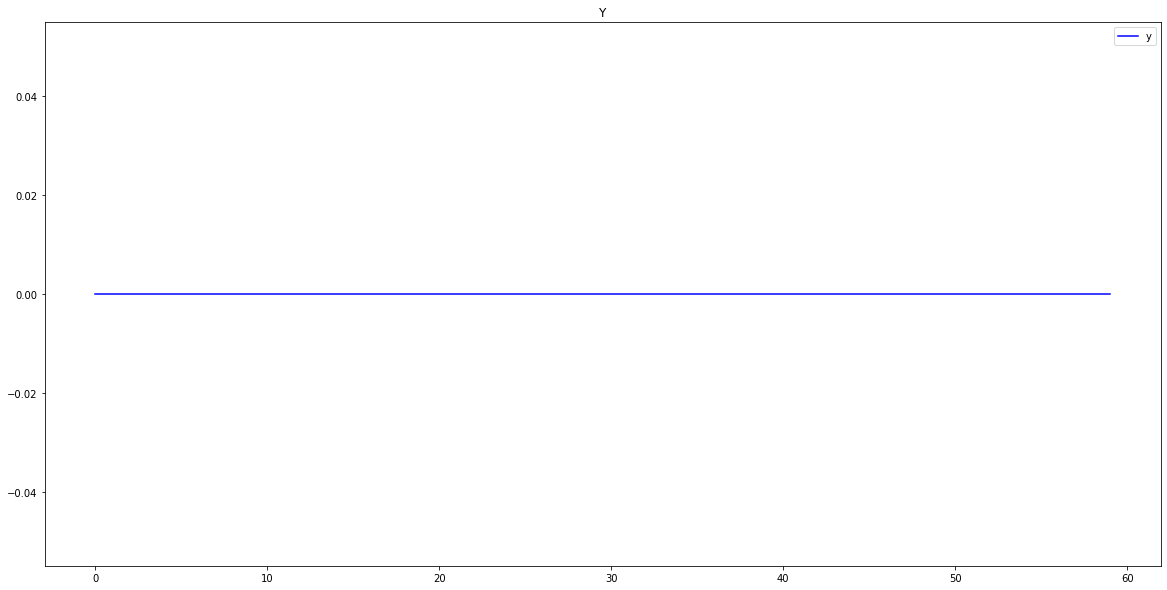

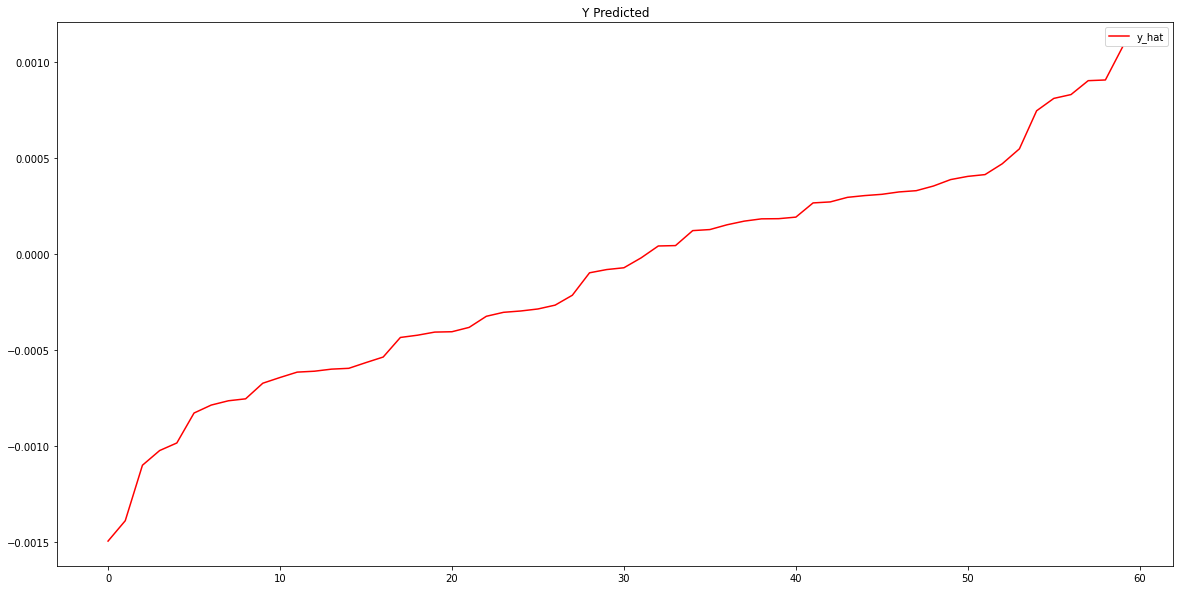

In [5]:
filename = '../data/data3'
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7


lr = logistic_regression(filename = filename , alphas = alphas , number_of_iterations = number_of_iterations ,
                         training_perc = training_perc )

# New Workings

$$ w = (X^TX)^{-1}X^TY $$

In [5]:
# filename = filename
# threshold = threshold
# alphas = alphas
# k = number_of_iterations
# training_perc = training_perc

def load_data():
    df_data = analytics.read_csv(filename+".csv")
    names = ['x'+str(i+1) for i in range((df_data.shape[1])-1)] + ['y']
    df_data = analytics.read_csv(filename+".csv" , names = names)
    df_data['x0'] = 1
    cols = list(df_data.columns)
    cols = [cols[-1]] + list(cols[:-1])
    df_data = df_data[cols]
    df_data['y'] = df_data['y'].replace(-1,0)

#     df_data_changed = df_data.drop(['x0','y'],axis = 1)
#     df_data_changed['y']  = 0
#     df_data_changed.to_csv(filename+'_changed.csv',index=False,header=False)
#     df_data = df_data
    return df_data
    #     find_weights()


def find_weights():
    lr = linear_regression()
    lr.load_data(filename+'_changed.csv')
    lr.monte_carlo(alphas,k,training_perc)
    training_set , testing_set = lr.split_data()
    lr.train( training_set , sgd  = True, plot_rmse = False , plot_metrics = False )
    lr.test(testing_set)
    maxima = lr.maxima
    minima = lr.minima
    w_star = lr.w_star
    predict()

def predict():
    df_data = df_data
    if 'y_pred' in df_data.columns : df_data = df_data.drop('y_pred',axis=1)
    x = df_data.iloc[:,:-1]
    for col in range(len(minima)):
        x.iloc[:,col] = (x.iloc[:,col] - minima[col]) / (maxima[col] - minima[col])
    y_pred = []
    for i in range(len(df_data)):
        y_pred.append(logit(x.iloc[i]))
    y_pred = [1 if y > threshold else 0 for y in y_pred]
    df_data['y_pred'] = y_pred
    create_confusion_matrix(df_data['y'],df_data['y_pred'])
    df_data = df_data


def bernoullis_distribution(x):
    db = maths.matmul(w_star.T,x)
    denominator = 1 + exp(-db)
    return 1/denominator

def logit(x):
    x = maths.matrix(x)
    f_x = bernoullis_distribution(x.T)
    return (f_x)/(1-f_x)

def create_confusion_matrix(y,y_pred):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == y_pred[i] == 1:
            tp = tp + 1
        elif y[i] == y_pred[i] == 0:
            tn = tn + 1
        elif y[i] == 1 and y_pred[i] == 0:
            fn = fn + 1
        else :
            fp = fp + 1

    conf_mat = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
    print("Confusion Matrix : ",conf_mat)
    confusion_matrix = conf_mat
    accuracy = find_accuracy()
    precision = find_precision()
    sensitivity = find_sensitivity()
    specificity = find_specificity()
    fscore = find_fscore()


def find_precision(show = True):
    conf_mat = confusion_matrix
    precision = round((conf_mat['tp'])/(conf_mat['fp']+conf_mat['tp'])*100,2) 
    if show : print("Precision : ",precision,"%")
    return precision

def find_accuracy( show = True):
    conf_mat = confusion_matrix
    accuracy = round((conf_mat['tp']+conf_mat['fp'])/(conf_mat['tp'] + conf_mat['tn'] + conf_mat['fp'] + conf_mat['fn'])*100,2)
    if show : print("Accuracy : ",accuracy,"%")
    return accuracy

def find_sensitivity(show = True):
    conf_mat = confusion_matrix
    sensitivity = round((conf_mat['tp'])/(conf_mat['tp']+conf_mat['fn'])*100,2)
    if show : print("Sensivity : ",sensitivity,"%")
    return sensitivity

def find_specificity(show = True):
    conf_mat = confusion_matrix
    specificity = round((conf_mat['tn'])/(conf_mat['fp']+conf_mat['tn'])*100,2)
    if show : print("Specificity : ",specificity,"%")
    return specificity

def find_fscore(show=True):
    conf_mat = confusion_matrix
    f_score = round(2/((1/find_precision(False))+(1/find_sensitivity(False)))*100,2)
    if show : print("F1 Score : ",f_score,"%")
    return f_score        


In [6]:
filename = '../data/data3'
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7


In [7]:
df_data = load_data()

In [8]:
df_data

,x0,x1,x2,y
0,1,-0.69736,-3.6535,1
1,1,-4.82200,-7.6336,1
2,1,-8.23430,-7.5536,1
3,1,-6.07640,-11.3800,1
4,1,-10.73600,-14.3760,1
...,...,...,...,...
195,1,8.22200,4.8614,0
196,1,11.64300,5.3394,0
197,1,8.16510,10.1410,0
198,1,14.25700,9.0196,0


In [9]:
validation_perc = 0.7 
validation_numbers = int(validation_perc * len(df_data))

In [10]:
df_data = df_data.sample(frac = 1)
df_validation = df_data[:validation_numbers]
df_test = df_data[validation_numbers:]

In [11]:
training_perc = 0.7
training_number = int(training_perc * len(df_validation))

In [12]:
df_validation = df_validation.sample(frac = 1)
df_validation_train = df_validation[:training_number]
df_validation_test = df_validation[training_number:]
df_validation_train

,x0,x1,x2,y
164,1,12.0210,7.8002,0
57,1,-11.2930,-11.4210,1
142,1,13.0440,8.7199,0
23,1,-11.9550,-10.0550,1
34,1,-13.6920,-5.6660,1
...,...,...,...,...
153,1,13.7600,7.3335,0
111,1,8.5146,7.4314,0
171,1,13.9830,6.9809,0
101,1,7.6591,6.6082,0


In [13]:
w_star = maths.matrix(maths.random.randint(0,10,len(df_validation_train.columns) - 1))
w_star = w_star.T
w_star

matrix([[7],
        [0],
        [7]])

In [14]:
maximas = []
minimas = []
for col in df_validation_train.columns[1:-1]:
    maximum = max(df_validation_train[col])
    minimum = min(df_validation_train[col])    
    diff = maximum - minimum
    df_validation_train[col] = (df_validation_train[col] - minimum) / diff
    df_validation_test[col] = (df_validation_test[col] - minimum) / diff
    df_test[col] = (df_test[col] - minimum) / diff
df_validation_train

,x0,x1,x2,y
164,1,0.823018,0.790907,0
57,1,0.177397,0.236775,1
142,1,0.851347,0.817422,0
23,1,0.159065,0.276155,1
34,1,0.110963,0.402687,1
...,...,...,...,...
153,1,0.871175,0.777453,0
111,1,0.725917,0.780275,0
171,1,0.877350,0.767287,0
101,1,0.702226,0.756543,0


In [57]:
def sigmoid(w_star,x):
    db = float(maths.matmul(w_star.T,x))
    print('db',db)
    denominator = 1 + exp(-db)
    return 1/denominator

def logit(w_star , x):
    f_x = sigmoid(w_star,x)
    if f_x == 1 : ratio = 0
    else : ratio = (f_x)/(1-f_x)
    return ratio

In [60]:
def gradient_descent(data):
    X = data.iloc[:,:-1]
    Y = data.iloc[:,-1]
    w_star = maths.matrix(maths.random.randint(0,10,X.shape[1])).T
    y_pred = []
    alpha = 0.1
    w_old = w_star + 1
    epsilon = 1e-3
    
    while maths.linalg.norm(w_star - w_old) >= epsilon:

        print(w_star)
        for row in range(len(X)):
            x = maths.matrix(X.iloc[row]).T
            y_pred.append(logit(w_star,x))
            w_star = w_star + alpha*((float(Y.iloc[row]) - y_pred[row]))*x

    data['y_pred'] = y_pred
    return w_star, data
    
    

In [69]:
maths.matmul(w_star.T,X.iloc[0].T)

array([-2930.32382168])

In [73]:
X.iloc[0].shape

(3,)

In [84]:
vector = maths.matrix(X.iloc[0]).T
vector

matrix([[1.        ],
        [0.82301792],
        [0.79090726]])

In [91]:
maths.array(vector)

array([[1.        ],
       [0.82301792],
       [0.79090726]])

In [88]:
vector.shape

(3, 1)

In [89]:
w_star.shape

(3, 1)

In [93]:
maths.inner(maths.array(w_star),maths.array(vector))

ValueError: shapes (3,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [96]:
vector.shape

(3, 1)

In [99]:
w_star.shape

(3, 1)

In [95]:
maths.matmul(w_star,vector)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

In [102]:
from math import log

In [115]:
data = df_validation_train
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
w_star = maths.matrix(maths.random.randint(0,10,X.shape[1])).T
y_pred = []
alpha = 0.2
w_old = w_star + 1
epsilon = 1e-3


def sigmoid(w_star,x):
    db = float(maths.matmul(w_star.T,x))
    print('db',db)
    denominator = 1 + exp(-db)
    return 1/denominator

def logit(w_star , x):
    f_x = sigmoid(w_star,x)
    if f_x == 1 : ratio = 1
    elif f_x == 0 : ratio = 0
    else : ratio = log(abs((f_x)/(1-f_x)))
    return ratio


while maths.linalg.norm(w_star - w_old) >= epsilon:
    print('Norm of w', maths.linalg.norm(w_star-w_old))
    print(w_star)
    for row in range(len(X)):
        x = maths.matrix(X.iloc[row]).T
        y_pred.append(float(maths.matmul(w_star.T,x)))
        
        w_star = w_star - alpha*float(y_pred[row] - Y.iloc[row])*x

data['y_pred'] = y_pred

Norm of w 1.7320508075688772
[[8]
 [5]
 [2]]
Norm of w 6257905750943.129
[[4.36021469e+12]
 [3.19134141e+12]
 [3.15677877e+12]]
Norm of w 12515811501887.969
[[8.72042939e+12]
 [6.38268282e+12]
 [6.31355754e+12]]
Norm of w 18773717252832.812
[[1.30806441e+13]
 [9.57402423e+12]
 [9.47033632e+12]]
Norm of w 25031623003777.652
[[1.74408588e+13]
 [1.27653656e+13]
 [1.26271151e+13]]
Norm of w 31289528754722.496
[[2.18010735e+13]
 [1.59567071e+13]
 [1.57838939e+13]]
Norm of w 37547434505667.336
[[2.61612882e+13]
 [1.91480485e+13]
 [1.89406726e+13]]
Norm of w 43805340256612.17
[[3.05215029e+13]
 [2.23393899e+13]
 [2.20974514e+13]]
Norm of w 50063246007557.01
[[3.48817175e+13]
 [2.55307313e+13]
 [2.52542302e+13]]
Norm of w 56321151758501.836
[[3.92419322e+13]
 [2.87220727e+13]
 [2.84110090e+13]]
Norm of w 62579057509446.664
[[4.36021469e+13]
 [3.19134141e+13]
 [3.15677877e+13]]
Norm of w 68836963260391.49
[[4.79623616e+13]
 [3.51047555e+13]
 [3.47245665e+13]]
Norm of w 75094869011336.31
[[5.232

Norm of w 1101391412166269.8
[[7.67397786e+14]
 [5.61676088e+14]
 [5.55593064e+14]]
Norm of w 1107649317917214.2
[[7.71758001e+14]
 [5.64867430e+14]
 [5.58749843e+14]]
Norm of w 1113907223668158.8
[[7.76118215e+14]
 [5.68058771e+14]
 [5.61906621e+14]]
Norm of w 1120165129419103.2
[[7.80478430e+14]
 [5.71250112e+14]
 [5.65063400e+14]]
Norm of w 1126423035170048.0
[[7.84838645e+14]
 [5.74441454e+14]
 [5.68220179e+14]]
Norm of w 1132680940920992.8
[[7.89198860e+14]
 [5.77632795e+14]
 [5.71376958e+14]]
Norm of w 1138938846671937.5
[[7.93559074e+14]
 [5.80824137e+14]
 [5.74533737e+14]]
Norm of w 1145196752422882.2
[[7.97919289e+14]
 [5.84015478e+14]
 [5.77690515e+14]]
Norm of w 1151454658173827.0
[[8.02279504e+14]
 [5.87206819e+14]
 [5.80847294e+14]]
Norm of w 1157712563924771.8
[[8.06639718e+14]
 [5.90398161e+14]
 [5.84004073e+14]]
Norm of w 1163970469675716.5
[[8.10999933e+14]
 [5.93589502e+14]
 [5.87160852e+14]]
Norm of w 1170228375426661.2
[[8.15360148e+14]
 [5.96780844e+14]
 [5.9031763

Norm of w 1908661254038163.5
[[1.32986548e+15]
 [9.73359130e+14]
 [9.62817526e+14]]
Norm of w 1914919159789108.5
[[1.33422570e+15]
 [9.76550471e+14]
 [9.65974304e+14]]
Norm of w 1921177065540053.8
[[1.33858591e+15]
 [9.79741813e+14]
 [9.69131083e+14]]
Norm of w 1927434971290999.0
[[1.34294613e+15]
 [9.82933154e+14]
 [9.72287862e+14]]
Norm of w 1933692877041944.0
[[1.34730634e+15]
 [9.86124496e+14]
 [9.75444641e+14]]
Norm of w 1939950782792889.2
[[1.35166656e+15]
 [9.89315837e+14]
 [9.78601419e+14]]
Norm of w 1946208688543834.5
[[1.35602677e+15]
 [9.92507179e+14]
 [9.81758198e+14]]
Norm of w 1952466594294779.8
[[1.36038698e+15]
 [9.95698520e+14]
 [9.84914977e+14]]
Norm of w 1958724500045725.0
[[1.36474720e+15]
 [9.98889861e+14]
 [9.88071756e+14]]
Norm of w 1964982405796670.0
[[1.36910741e+15]
 [1.00208120e+15]
 [9.91228535e+14]]
Norm of w 1971240311547615.2
[[1.37346763e+15]
 [1.00527254e+15]
 [9.94385313e+14]]
Norm of w 1977498217298560.5
[[1.37782784e+15]
 [1.00846389e+15]
 [9.9754209

Norm of w 2678383661404390.5
[[1.86617189e+15]
 [1.36589412e+15]
 [1.35110131e+15]]
Norm of w 2684641567155335.5
[[1.87053210e+15]
 [1.36908546e+15]
 [1.35425809e+15]]
Norm of w 2690899472906280.0
[[1.87489232e+15]
 [1.37227681e+15]
 [1.35741487e+15]]
Norm of w 2697157378657225.0
[[1.87925253e+15]
 [1.37546815e+15]
 [1.36057165e+15]]
Norm of w 2703415284408169.5
[[1.88361275e+15]
 [1.37865949e+15]
 [1.36372843e+15]]
Norm of w 2709673190159114.0
[[1.88797296e+15]
 [1.38185083e+15]
 [1.36688521e+15]]
Norm of w 2715931095910059.0
[[1.89233318e+15]
 [1.38504217e+15]
 [1.37004199e+15]]
Norm of w 2722189001661004.0
[[1.89669339e+15]
 [1.38823351e+15]
 [1.37319877e+15]]
Norm of w 2728446907411949.0
[[1.90105361e+15]
 [1.39142485e+15]
 [1.37635554e+15]]
Norm of w 2734704813162893.5
[[1.90541382e+15]
 [1.39461620e+15]
 [1.37951232e+15]]
Norm of w 2740962718913838.0
[[1.90977404e+15]
 [1.39780754e+15]
 [1.38266910e+15]]
Norm of w 2747220624664783.0
[[1.91413425e+15]
 [1.40099888e+15]
 [1.3858258

Norm of w 3373011199759219.5
[[2.35015572e+15]
 [1.72013302e+15]
 [1.70150376e+15]]
Norm of w 3379269105510162.5
[[2.35451593e+15]
 [1.72332436e+15]
 [1.70466054e+15]]
Norm of w 3385527011261106.0
[[2.35887615e+15]
 [1.72651570e+15]
 [1.70781732e+15]]
Norm of w 3391784917012049.0
[[2.36323636e+15]
 [1.72970704e+15]
 [1.71097409e+15]]
Norm of w 3398042822762992.0
[[2.36759658e+15]
 [1.73289839e+15]
 [1.71413087e+15]]
Norm of w 3404300728513934.5
[[2.37195679e+15]
 [1.73608973e+15]
 [1.71728765e+15]]
Norm of w 3410558634264878.0
[[2.37631701e+15]
 [1.73928107e+15]
 [1.72044443e+15]]
Norm of w 3416816540015821.0
[[2.38067722e+15]
 [1.74247241e+15]
 [1.72360121e+15]]
Norm of w 3423074445766764.0
[[2.38503744e+15]
 [1.74566375e+15]
 [1.72675799e+15]]
Norm of w 3429332351517707.0
[[2.38939765e+15]
 [1.74885509e+15]
 [1.72991477e+15]]
Norm of w 3435590257268650.0
[[2.39375787e+15]
 [1.75204643e+15]
 [1.73307155e+15]]
Norm of w 3441848163019593.0
[[2.39811808e+15]
 [1.75523778e+15]
 [1.7362283

Norm of w 4536981669434661.0
[[3.16115565e+15]
 [2.31372252e+15]
 [2.28866461e+15]]
Norm of w 4543239575185606.0
[[3.16551587e+15]
 [2.31691386e+15]
 [2.29182139e+15]]
Norm of w 4549497480936551.0
[[3.16987608e+15]
 [2.32010521e+15]
 [2.29497817e+15]]
Norm of w 4555755386687496.0
[[3.17423630e+15]
 [2.32329655e+15]
 [2.29813495e+15]]
Norm of w 4562013292438441.0
[[3.17859651e+15]
 [2.32648789e+15]
 [2.30129173e+15]]
Norm of w 4568271198189387.0
[[3.18295673e+15]
 [2.32967923e+15]
 [2.30444850e+15]]
Norm of w 4574529103940332.0
[[3.18731694e+15]
 [2.33287057e+15]
 [2.30760528e+15]]
Norm of w 4580787009691277.0
[[3.19167716e+15]
 [2.33606191e+15]
 [2.31076206e+15]]
Norm of w 4587044915442222.0
[[3.19603737e+15]
 [2.33925325e+15]
 [2.31391884e+15]]
Norm of w 4593302821193167.0
[[3.20039759e+15]
 [2.34244459e+15]
 [2.31707562e+15]]
Norm of w 4599560726944112.0
[[3.20475780e+15]
 [2.34563594e+15]
 [2.32023240e+15]]
Norm of w 4605818632695058.0
[[3.20911801e+15]
 [2.34882728e+15]
 [2.3233891

Norm of w 5419346380317931.0
[[3.77594592e+15]
 [2.76370166e+15]
 [2.73377042e+15]]
Norm of w 5425604286068876.0
[[3.78030614e+15]
 [2.76689300e+15]
 [2.73692720e+15]]
Norm of w 5431862191819822.0
[[3.78466635e+15]
 [2.77008434e+15]
 [2.74008397e+15]]
Norm of w 5438120097570767.0
[[3.78902657e+15]
 [2.77327569e+15]
 [2.74324075e+15]]
Norm of w 5444378003321712.0
[[3.79338678e+15]
 [2.77646703e+15]
 [2.74639753e+15]]
Norm of w 5450635909072657.0
[[3.79774700e+15]
 [2.77965837e+15]
 [2.74955431e+15]]
Norm of w 5456893814823602.0
[[3.80210721e+15]
 [2.78284971e+15]
 [2.75271109e+15]]
Norm of w 5463151720574547.0
[[3.80646743e+15]
 [2.78604105e+15]
 [2.75586787e+15]]
Norm of w 5469409626325493.0
[[3.81082764e+15]
 [2.78923239e+15]
 [2.75902465e+15]]
Norm of w 5475667532076438.0
[[3.81518786e+15]
 [2.79242373e+15]
 [2.76218143e+15]]
Norm of w 5481925437827383.0
[[3.81954807e+15]
 [2.79561508e+15]
 [2.76533820e+15]]
Norm of w 5488183343578328.0
[[3.82390829e+15]
 [2.79880642e+15]
 [2.7684949

[[4.35585448e+15]
 [3.18815007e+15]
 [3.15362199e+15]]
Norm of w 6257905750944585.0
[[4.36021469e+15]
 [3.19134141e+15]
 [3.15677877e+15]]
Norm of w 6264163656695530.0
[[4.36457491e+15]
 [3.19453275e+15]
 [3.15993555e+15]]
Norm of w 6270421562446476.0
[[4.36893512e+15]
 [3.19772409e+15]
 [3.16309233e+15]]
Norm of w 6276679468197421.0
[[4.37329534e+15]
 [3.20091543e+15]
 [3.16624911e+15]]
Norm of w 6282937373948366.0
[[4.37765555e+15]
 [3.20410678e+15]
 [3.16940589e+15]]
Norm of w 6289195279699311.0
[[4.38201577e+15]
 [3.20729812e+15]
 [3.17256267e+15]]
Norm of w 6295453185450256.0
[[4.38637598e+15]
 [3.21048946e+15]
 [3.17571944e+15]]
Norm of w 6301711091201201.0
[[4.39073620e+15]
 [3.21368080e+15]
 [3.17887622e+15]]
Norm of w 6307968996952147.0
[[4.39509641e+15]
 [3.21687214e+15]
 [3.18203300e+15]]
Norm of w 6314226902703092.0
[[4.39945663e+15]
 [3.22006348e+15]
 [3.18518978e+15]]
Norm of w 6320484808454037.0
[[4.40381684e+15]
 [3.22325482e+15]
 [3.18834656e+15]]
Norm of w 63267427142

Norm of w 6908727949043032.0
[[4.81367702e+15]
 [3.52324092e+15]
 [3.48508376e+15]]
Norm of w 6914985854793979.0
[[4.81803724e+15]
 [3.52643226e+15]
 [3.48824054e+15]]
Norm of w 6921243760544927.0
[[4.82239745e+15]
 [3.52962360e+15]
 [3.49139732e+15]]
Norm of w 6927501666295874.0
[[4.82675767e+15]
 [3.53281494e+15]
 [3.49455410e+15]]
Norm of w 6933759572046821.0
[[4.83111788e+15]
 [3.53600628e+15]
 [3.49771088e+15]]
Norm of w 6940017477797769.0
[[4.83547810e+15]
 [3.53919762e+15]
 [3.50086766e+15]]
Norm of w 6946275383548716.0
[[4.83983831e+15]
 [3.54238897e+15]
 [3.50402444e+15]]
Norm of w 6952533289299663.0
[[4.84419852e+15]
 [3.54558031e+15]
 [3.50718122e+15]]
Norm of w 6958791195050610.0
[[4.84855874e+15]
 [3.54877165e+15]
 [3.51033799e+15]]
Norm of w 6965049100801558.0
[[4.85291895e+15]
 [3.55196299e+15]
 [3.51349477e+15]]
Norm of w 6971307006552505.0
[[4.85727917e+15]
 [3.55515433e+15]
 [3.51665155e+15]]
Norm of w 6977564912303452.0
[[4.86163938e+15]
 [3.55834567e+15]
 [3.5198083

Norm of w 7766061036922808.0
[[5.41102643e+15]
 [3.96045469e+15]
 [3.91756246e+15]]
Norm of w 7772318942673755.0
[[5.41538665e+15]
 [3.96364603e+15]
 [3.92071924e+15]]
Norm of w 7778576848424703.0
[[5.41974686e+15]
 [3.96683737e+15]
 [3.92387601e+15]]
Norm of w 7784834754175649.0
[[5.42410708e+15]
 [3.97002871e+15]
 [3.92703279e+15]]
Norm of w 7791092659926597.0
[[5.42846729e+15]
 [3.97322006e+15]
 [3.93018957e+15]]
Norm of w 7797350565677544.0
[[5.43282751e+15]
 [3.97641140e+15]
 [3.93334635e+15]]
Norm of w 7803608471428492.0
[[5.43718772e+15]
 [3.97960274e+15]
 [3.93650313e+15]]
Norm of w 7809866377179439.0
[[5.44154794e+15]
 [3.98279408e+15]
 [3.93965991e+15]]
Norm of w 7816124282930387.0
[[5.44590815e+15]
 [3.98598542e+15]
 [3.94281669e+15]]
Norm of w 7822382188681334.0
[[5.45026837e+15]
 [3.98917676e+15]
 [3.94597347e+15]]
Norm of w 7828640094432281.0
[[5.45462858e+15]
 [3.99236810e+15]
 [3.94913024e+15]]
Norm of w 7834898000183228.0
[[5.45898880e+15]
 [3.99555945e+15]
 [3.9522870

KeyboardInterrupt: 

In [196]:
Y.iloc[row] - y_pred[row]

195802.11327565592

In [162]:
gradient_descent(df_validation_train)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)